<a href="https://colab.research.google.com/github/Chaiithra/Random-Forest-Employee-Attrition/blob/main/Employee_Attriiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries:

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Load the Dta

In [47]:
data = pd.read_csv('Dataset01-Employee_Attrition.csv')

In [48]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Dataset size

In [49]:
data.shape

(14999, 10)

List of Columns

In [50]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Data types of the columns

In [51]:
data.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


Data Information

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Checking for Duplicate Records

In [53]:
data.duplicated().sum()

3008

In [54]:
data = data.drop_duplicates()

In [55]:
data.shape

(11991, 10)

Check for Missing Values

In [56]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


Data Exploration and Visualization

In [57]:
data['left'].value_counts()

,count
left,
0,10000
1,1991


<Axes: xlabel='left'>

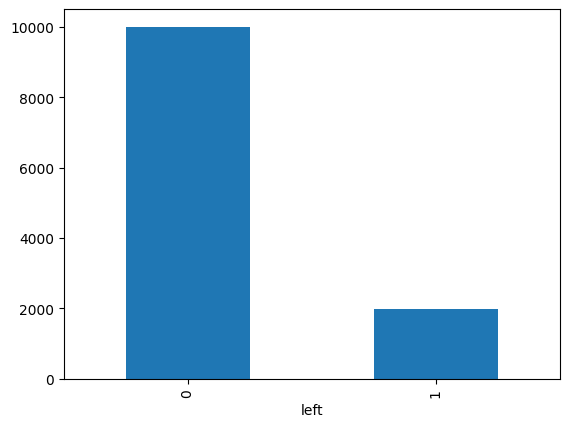

In [58]:
data['left'].value_counts().plot(kind='bar')

In [59]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Impact of salary on employee retention

<Axes: xlabel='salary'>

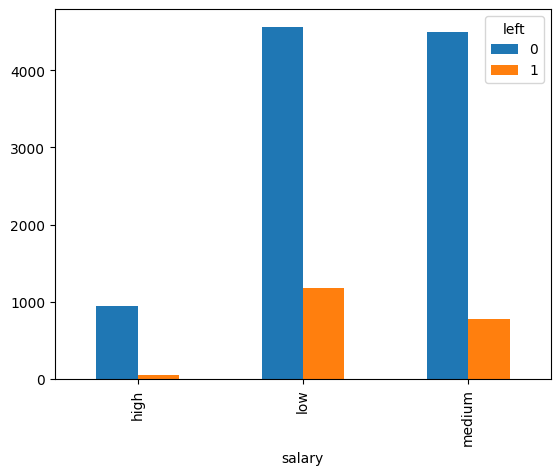

In [60]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

The above graph shows us that employees with high salaries are less likely to leave the company

Department wise Employee retention rate

<Axes: xlabel='Department'>

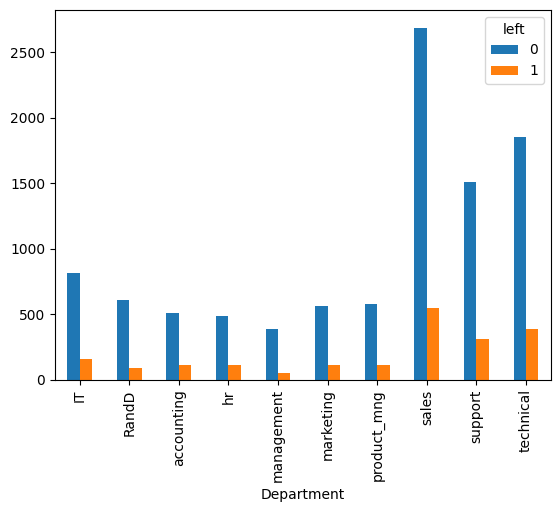

In [61]:
pd.crosstab(data.Department, data.left).plot(kind='bar')

In [62]:
pd.crosstab(data.Department, data.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


Distribution of each numerical features:

In [63]:
nf1= [f for f in data.columns if data.dtypes[f]=='float64']
nf1

['satisfaction_level', 'last_evaluation']

In [64]:
nf2= [f for f in data.columns if data.dtypes[f]=='int64']
nf2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [65]:
ncl = ['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years','satisfaction_level', 'last_evaluation']

<ipython-input-66-bae804185f30>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cl], ax=axis)
<ipython-input-66-bae804185f30>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cl], ax=axis)
<ipython-input-66-bae804185f30>:3: UserWarning: 

`distplot` is a deprecated function and will b

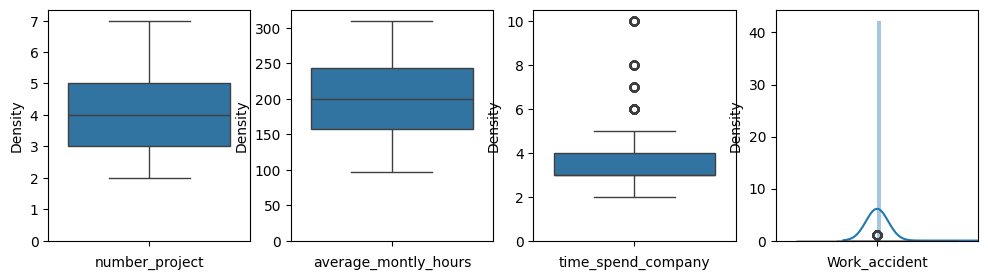

In [66]:
fig, axes = plt.subplots(ncols= 4, figsize=(12,3) )
for cl, axis in zip(ncl, axes.flatten()):
    sns.distplot(data[cl], ax=axis)
    sns.boxplot(data[cl], ax=axis)

<Axes: ylabel='Frequency'>

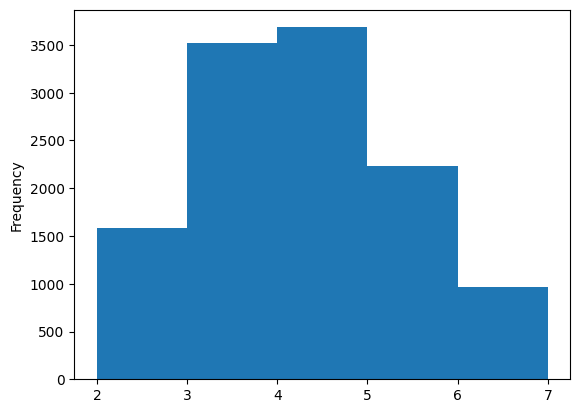

In [67]:
data['number_project'].plot(kind='hist', bins = 5)

<Axes: ylabel='Frequency'>

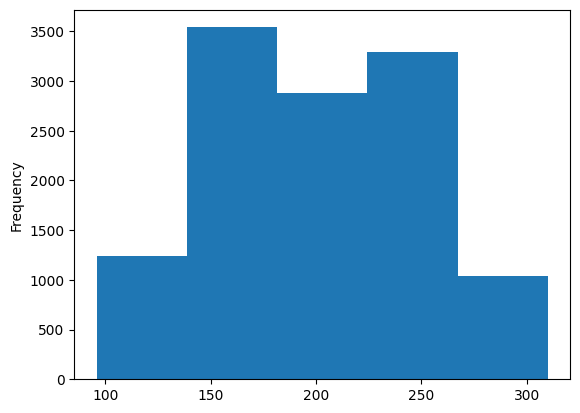

In [71]:
data['average_montly_hours'].plot(kind='hist', bins = 5)

<Axes: ylabel='Frequency'>

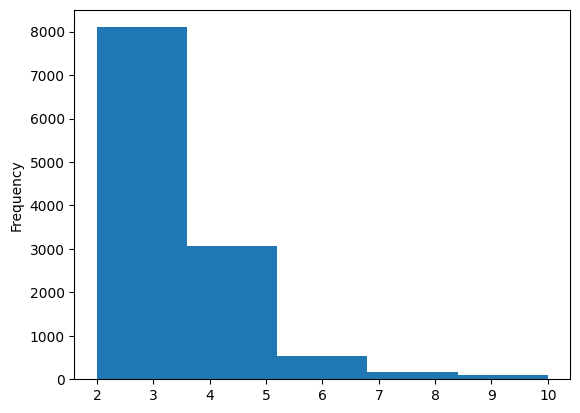

In [72]:
data['time_spend_company'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

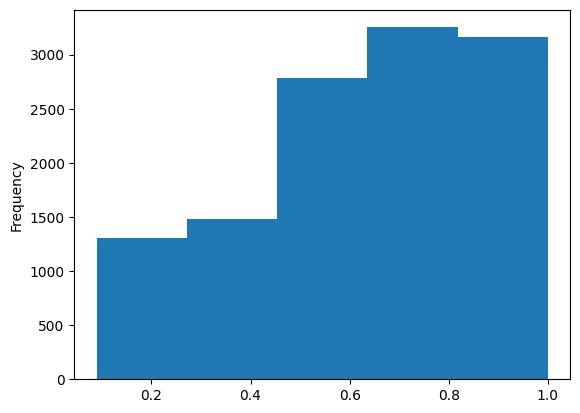

In [73]:
data['satisfaction_level'].plot(kind= 'hist', bins= 5)

<Axes: ylabel='Frequency'>

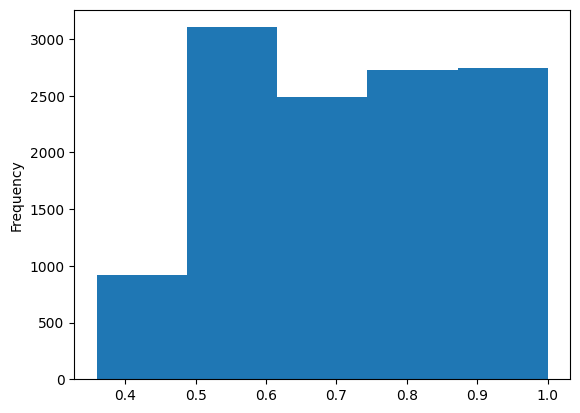

In [74]:
data['last_evaluation'].plot(kind='hist', bins = 5)

Feature Engineering:

Label Encoding: Converting Categorical Features into Numerical

In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [76]:
data['salary'] = label_encoder.fit_transform(data['salary'])
data['Department']= label_encoder.fit_transform(data['Department'])

In [77]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


Dependednt(Target) and Independent Variables

In [78]:
x = data.drop('left', axis = 1)
y = data['left']

Splitting data into Training and Testing:

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [81]:
x.shape

(11991, 9)

In [82]:
x_train.shape

(8393, 9)

In [83]:
x_test.shape

(3598, 9)

Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [85]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [86]:
x_train_sc
x_test_sc

array([[-2.22742513,  0.43291544,  1.88269265, ..., -0.13258967,
         0.39828954, -0.55478764],
       [ 0.45806617,  1.44417604,  0.16290168, ..., -0.13258967,
         0.743589  ,  1.03223781],
       [ 0.74727292,  1.50366195,  0.16290168, ..., -0.13258967,
         0.39828954, -0.55478764],
       ...,
       [ 0.37543566,  0.01651402,  1.02279717, ..., -0.13258967,
         1.08888847, -0.55478764],
       [-2.06216412,  1.14674645, -1.55688929, ..., -0.13258967,
         0.39828954,  1.03223781],
       [ 0.82990342,  1.26571828, -0.6969938 , ..., -0.13258967,
        -0.98290832, -0.55478764]])

Model Deployement

Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_sc, y_train)

RandomForestClassifier()

Model Prediction

In [89]:
y_pred = rf.predict(x_test_sc)

Model Evaluation

Confusion Matrix

In [90]:
from sklearn.metrics import pair_confusion_matrix
cm = pair_confusion_matrix(y_test, y_pred)
print(cm)

[[3291508  320462]
 [ 111052 9218984]]


<Axes: >

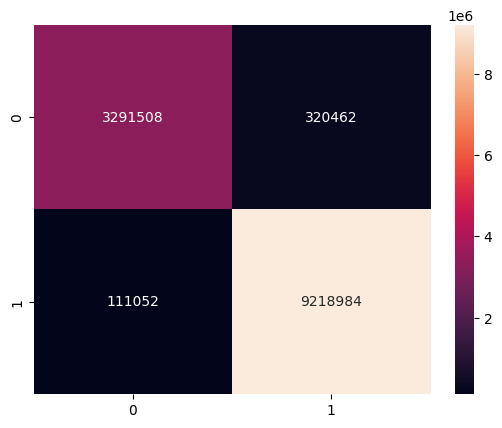

In [92]:
sns.heatmap(cm, annot= True, fmt='d')

Accuracy

In [91]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print(model_accuracy)

0.9830461367426347


Precision

In [93]:
from sklearn.metrics import precision_score
model_precision = precision_score(y_test, y_pred)
print(model_precision)

0.9839285714285714


Recall

In [94]:
from sklearn.metrics import recall_score
model_recall = recall_score(y_test, y_pred)
print(model_recall)

0.9137645107794361


Classification Report

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       0.98      0.91      0.95       603

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598



Feature Importance and Metrics in Random Forest / Feature Extraction

In [96]:
score_list = rf.feature_importances_
list_of_features = list(x.columns)
score_df = pd.DataFrame({'Features':list_of_features, 'Score':score_list})
score_df.sort_values(by='Score', ascending=False)

,Features,Score
0,satisfaction_level,0.373033
2,number_project,0.174354
4,time_spend_company,0.163549
3,average_montly_hours,0.143487
1,last_evaluation,0.121101
7,Department,0.011824
8,salary,0.007537
5,Work_accident,0.004301
6,promotion_last_5years,0.000814


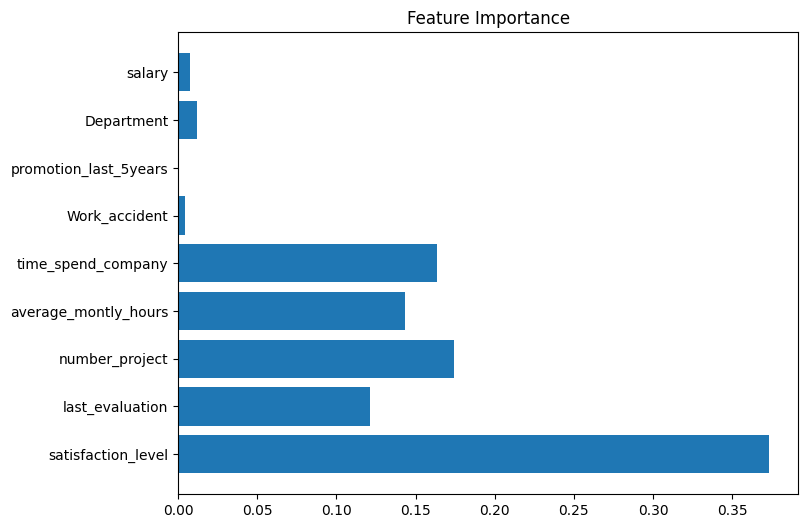

In [97]:
list_of_features = list(x.columns)
plt.figure(figsize=(8,6))
plt.barh(list_of_features, score_list)
plt.title('Feature Importance')
plt.show()

k-Fold Cross Validation

In [98]:
#Applying 5-fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_train_sc, y_train, cv=5, scoring ='accuracy')
print(scores)

[0.98570578 0.983919   0.98451459 0.98569726 0.98808105]


In [99]:
avg_model_score= scores.mean()

In [100]:
print(avg_model_score)

0.9855835352361536


Hyper Parameter Tuning

Grid Search CV | Random Search CV

In [101]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

List of Parameters:

In [108]:
parameters = { 'n_estimators': [50,100], 'max_features': ['sqrt','log2',None]}

Search the Best Parameters

In [109]:
grid_search = GridSearchCV( estimator = rf, param_grid = parameters)

In [110]:
grid_search.fit(x_train_sc, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

Best Parameters:

In [111]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

Building new model with best parameters

In [112]:
rf1= RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf1.fit(x_train_sc, y_train)

RandomForestClassifier()

k - Fold Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf1, x_train_sc,y_train, cv = 5, scoring='accuracy')
print(scores)

[0.98511018 0.98451459 0.983919   0.98510131 0.9874851 ]


Average Accuracy Scores of Cross Validation

In [115]:
avg_model_score = scores.mean()
print(avg_model_score)

0.9852260376905771
